# Exploratory Data Analysis

Eda of flight data
1. Cleaning data
2. Exploring data to find the most travelled destination, preffered airline

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
data=pd.read_csv(r"536803321_T_T100I_SEGMENT_ALL_CARRIER.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15136 entries, 0 to 15135
Data columns (total 44 columns):
DEPARTURES_SCHEDULED     15136 non-null float64
DEPARTURES_PERFORMED     15136 non-null float64
PAYLOAD                  15136 non-null float64
SEATS                    15136 non-null float64
PASSENGERS               15136 non-null float64
FREIGHT                  15136 non-null float64
MAIL                     15136 non-null float64
DISTANCE                 15136 non-null float64
RAMP_TO_RAMP             15136 non-null float64
AIR_TIME                 15136 non-null float64
UNIQUE_CARRIER           15136 non-null object
AIRLINE_ID               15136 non-null int64
UNIQUE_CARRIER_NAME      15136 non-null object
UNIQUE_CARRIER_ENTITY    15136 non-null object
REGION                   15136 non-null object
CARRIER                  15136 non-null object
CARRIER_NAME             15136 non-null object
CARRIER_GROUP            15136 non-null int64
CARRIER_GROUP_NEW        15136 non-nu

### Checking for null value

In [4]:
data.isnull().sum()

DEPARTURES_SCHEDULED         0
DEPARTURES_PERFORMED         0
PAYLOAD                      0
SEATS                        0
PASSENGERS                   0
FREIGHT                      0
MAIL                         0
DISTANCE                     0
RAMP_TO_RAMP                 0
AIR_TIME                     0
UNIQUE_CARRIER               0
AIRLINE_ID                   0
UNIQUE_CARRIER_NAME          0
UNIQUE_CARRIER_ENTITY        0
REGION                       0
CARRIER                      0
CARRIER_NAME                 0
CARRIER_GROUP                0
CARRIER_GROUP_NEW            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
ORIGIN                       0
ORIGIN_CITY_NAME             0
ORIGIN_COUNTRY               0
ORIGIN_COUNTRY_NAME          0
ORIGIN_WAC                   0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEST                         0
DEST_CITY_NAME               0
DEST_COU

Last column not present in the original dataset. It is being wrongly picked up.

In [5]:
data["Unnamed: 43"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
15106   NaN
15107   NaN
15108   NaN
15109   NaN
15110   NaN
15111   NaN
15112   NaN
15113   NaN
15114   NaN
15115   NaN
15116   NaN
15117   NaN
15118   NaN
15119   NaN
15120   NaN
15121   NaN
15122   NaN
15123   NaN
15124   NaN
15125   NaN
15126   NaN
15127   NaN
15128   NaN
15129   NaN
15130   NaN
15131   NaN
15132   NaN
15133   NaN
15134   NaN
15135   NaN
Name: Unnamed: 43, Length: 15136, dtype: float64

Deleting last column :

In [6]:
data_new=data.drop('Unnamed: 43', axis=1)

In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15136 entries, 0 to 15135
Data columns (total 43 columns):
DEPARTURES_SCHEDULED     15136 non-null float64
DEPARTURES_PERFORMED     15136 non-null float64
PAYLOAD                  15136 non-null float64
SEATS                    15136 non-null float64
PASSENGERS               15136 non-null float64
FREIGHT                  15136 non-null float64
MAIL                     15136 non-null float64
DISTANCE                 15136 non-null float64
RAMP_TO_RAMP             15136 non-null float64
AIR_TIME                 15136 non-null float64
UNIQUE_CARRIER           15136 non-null object
AIRLINE_ID               15136 non-null int64
UNIQUE_CARRIER_NAME      15136 non-null object
UNIQUE_CARRIER_ENTITY    15136 non-null object
REGION                   15136 non-null object
CARRIER                  15136 non-null object
CARRIER_NAME             15136 non-null object
CARRIER_GROUP            15136 non-null int64
CARRIER_GROUP_NEW        15136 non-nu

In [8]:
data_new.describe()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,15136.000000,15136.000000,1.513600e+04,15136.000000,15136.000000,1.513600e+04,15136.000000,15136.000000,15136.000000,15136.000000,...,1.513600e+04,15136.000000,15136.000000,15136.000000,15136.000000,15136.000000,15136.0,15136.0,15136.000000,15136.000000
mean,9.674617,17.741742,1.079669e+06,2847.441927,2164.840777,2.086568e+05,2149.037989,2386.231765,2550.953687,2280.379228,...,1.315679e+06,32490.882994,256.529863,6.193842,670.440737,1.155127,2017.0,1.0,1.487315,5.284025
std,20.011388,22.441015,1.568130e+06,3998.706118,3172.731450,7.265715e+05,14792.587383,1929.297797,5077.198519,4699.877116,...,1.722883e+05,1715.897701,299.035625,0.922045,99.955031,0.383829,0.0,0.0,0.499856,3.852894
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,29.000000,0.000000,0.000000,...,1.013603e+06,30082.000000,1.000000,0.000000,30.000000,1.000000,2017.0,1.0,1.000000,1.000000
25%,0.000000,2.000000,1.150000e+05,150.000000,82.000000,0.000000e+00,0.000000,1023.000000,0.000000,0.000000,...,1.173103e+06,31032.000000,34.000000,6.000000,622.000000,1.000000,2017.0,1.0,1.000000,3.000000
50%,0.000000,10.000000,5.081420e+05,1149.500000,831.000000,0.000000e+00,0.000000,1597.000000,235.000000,199.000000,...,1.318002e+06,32134.000000,108.000000,6.000000,655.000000,1.000000,2017.0,1.0,1.000000,4.000000
75%,13.000000,27.000000,1.413600e+06,4308.500000,3217.000000,1.173922e+05,0.000000,3799.000000,2561.250000,2135.250000,...,1.431202e+06,33518.000000,419.000000,6.000000,698.000000,1.000000,2017.0,1.0,2.000000,8.000000
max,560.000000,306.000000,3.677080e+07,46135.000000,41918.000000,3.010074e+07,403411.000000,9100.000000,50348.000000,47470.000000,...,1.671901e+06,36698.000000,961.000000,8.000000,889.000000,4.000000,2017.0,1.0,2.000000,19.000000


In [9]:
data_new['DEST_COUNTRY_NAME'].describe()

count             15136
unique              115
top       United States
freq               7527
Name: DEST_COUNTRY_NAME, dtype: object

In [10]:
data_new['ORIGIN_COUNTRY_NAME'].describe()

count             15136
unique              110
top       United States
freq               7609
Name: ORIGIN_COUNTRY_NAME, dtype: object

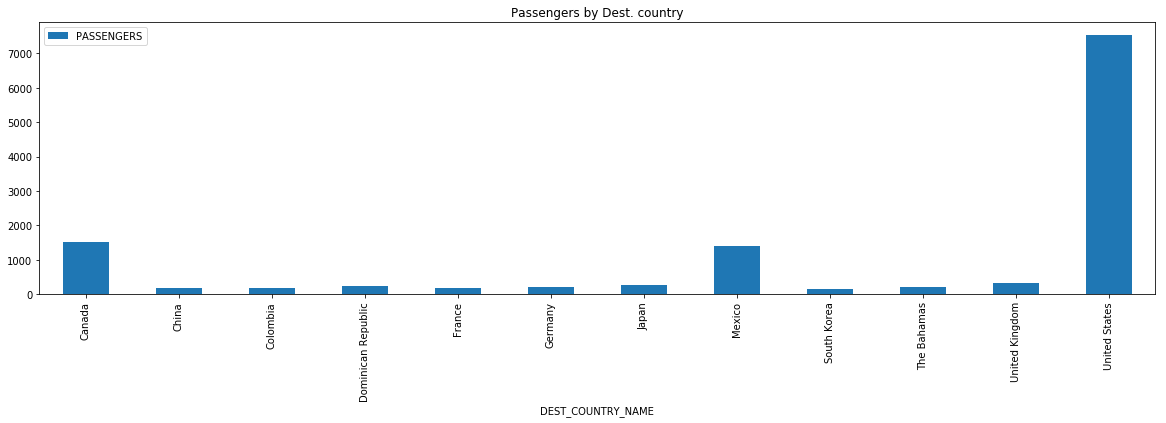

In [11]:
dtafilter_dest=data_new.groupby('DEST_COUNTRY_NAME').filter(lambda x : ( x['DEST_COUNTRY_NAME'].value_counts()>150).any() )
dtafilter_dest.groupby('DEST_COUNTRY_NAME').agg({'PASSENGERS':'size'}).plot(kind="bar", figsize=[20,5], title="Passengers by Dest. country")

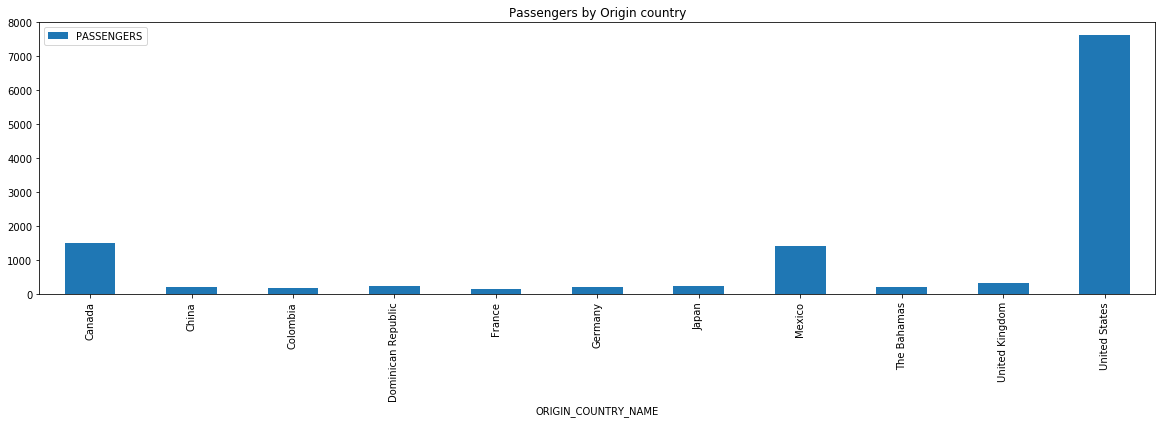

In [12]:
dtafilter_ori=data_new.groupby('ORIGIN_COUNTRY_NAME').filter(lambda x : ( x['ORIGIN_COUNTRY_NAME'].value_counts()>150).any() )
dtafilter_ori.groupby('ORIGIN_COUNTRY_NAME').agg({'PASSENGERS':'size'}).plot(kind="bar", figsize=[20,5], title="Passengers by Origin country")

#### The most travel took place between USA,Canada and Mexico

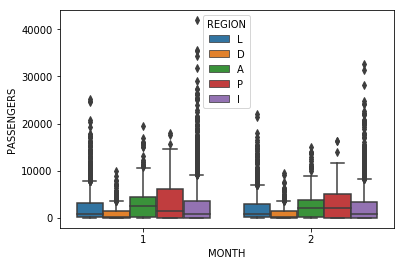

In [13]:
data_new.groupby('MONTH').agg({'PASSENGERS':'size'})
sns.boxplot(x='MONTH', y='PASSENGERS', hue='REGION', data=data_new)

In [14]:
data_new['CARRIER_NAME'].value_counts()

United Air Lines Inc.                                          1456
Delta Air Lines Inc.                                           1453
American Airlines Inc.                                         1288
Westjet                                                         514
JetBlue Airways                                                 411
Air Canada                                                      365
Alaska Airlines Inc.                                            329
Federal Express Corporation                                     289
Concesionaria Vuela Compania De Aviacion SA de CV (Volaris)     277
Norwegian Air Shuttle ASA                                       243
United Parcel Service                                           234
SkyWest Airlines Inc.                                           215
Lufthansa German Airlines                                       208
Southwest Airlines Co.                                          192
British Airways Plc                             

#### United Airlines is the preffered carrier

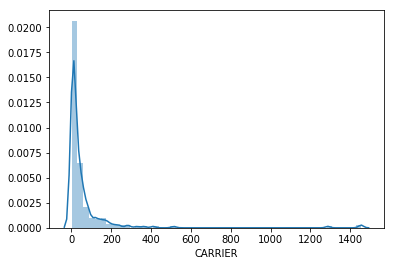

In [15]:
sns.distplot(data_new['CARRIER'].value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002058EDAFEF0>]], dtype=object)

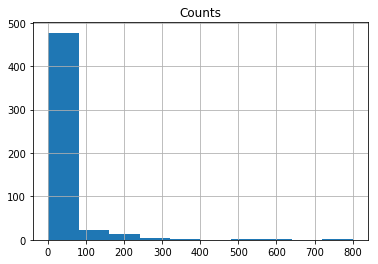

In [16]:
data_count=data_new['DEST'].value_counts()         #.index.tolist()
data_count_index=data_new['DEST'].value_counts().index.tolist()
df=pd.DataFrame({'Dest': data_count_index, 'Counts':data_count})
df.hist()

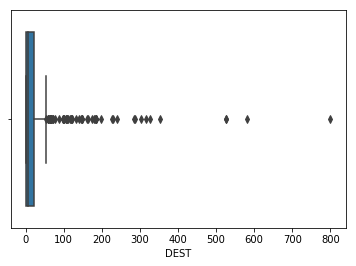

In [17]:
sns.boxplot(x=data_new['DEST'].value_counts()) 